**COMP 3000 - Sentimental and Emotional Analysis**

In [ ]:
#Import libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from textblob import TextBlob
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Convert the CSV file into a Data Frame for both data sets 

In [ ]:
rishi_tweets=pd.read_csv("data_rishi.csv",encoding='latin1', on_bad_lines='skip', low_memory=False, engine=None)
rishi_tweets['hastag']='RishiSunak'
print(rishi_tweets.head())

                    id                                               text  \
0  1584696134693711873  @BritIndianVoice @RishiSunak #RishiSunak is #B...   
1  1584696057841098752  #RishiSunak is the richest Tory MP in history....   
2  1584695906091536385                                        #RishiSunak   
3  1584695822658441217  A mountain full of money and a knowledge of pr...   
4  1584695640696946688  @trussliz @RishiSunak Chance was been given as...   

          username                                           hashtags  \
0      IsmailYSyed  ['RishiSunak', 'BritishHindu', 'Pakistani', 'P...   
1       AdameMedia                                     ['RishiSunak']   
2  ROHITKU96224077                                     ['RishiSunak']   
3       Parisistas                                     ['RishiSunak']   
4    baboo_prasant                                     ['RishiSunak']   

                  created_at  user followers count  replycount  retweetcount  \
0  2022-10-24 23:5

In [ ]:
biden_tweets=pd.read_csv("data_joebiden.csv",encoding='latin1', on_bad_lines='skip', low_memory=False, engine=None)
biden_tweets['hastag']='JoeBiden'
print(biden_tweets)

                 created_at               tweet_id  \
0       2020-11-07 16:56:15  1.32511988815594E+018   
1       2020-11-07 16:56:15  1.32511988685565E+018   
2       2020-11-07 16:56:16  1.32511989292486E+018   
3       2020-11-07 16:56:16  1.32511989284091E+018   
4       2020-11-07 16:56:16  1.32511989167067E+018   
...                     ...                    ...   
100024  2020-11-07 23:41:31  1.32522187634451E+018   
100025  2020-11-07 23:41:32  1.32522188170901E+018   
100026  2020-11-07 23:41:33  1.32522188303863E+018   
100027  2020-11-07 23:41:33  1.32522188564729E+018   
100028  2020-11-07 23:41:34  1.32522188722859E+018   

                                                    tweet likes retweet_count  \
0       Congratulations @KamalaHarris !!! #Elections20...     5             1   
1       God Bless America. Please restore our democrac...     3             0   
2       This is AMAZING! Best news we heard about Amer...     0             0   
3                          

Clean the tweets for optimal results

In [ ]:
def clean_tweets(text):
 
    text = re.sub(r':', '', str(text))
    text = re.sub(r'‚Ä¶', '', str(text))
    text = re.sub('@[A-Za-z0–9]+', '', str(text))               
    text = re.sub('#', '', str(text)) 
    text = re.sub('https?:\/\/\S+', '', str(text)) 
    text = re.sub(r'[^\x00-\x7F]+',' ',str(text))
    text = str(text).lower()
    tweet = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub('https', '', text)
    text = re.sub('https ', '', text)
    

    return text

Apply the TextBlob Sentimental Analysis as well as the Clean Tweets

In [ ]:
def getSubjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

def getPolarity(text):
    try:
        return  TextBlob(text).sentiment.polarity
    except:
        return None

def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

language='en'
rishi_tweets=rishi_tweets[rishi_tweets['language']==language]
rishi_tweets['edited_tweet'] = rishi_tweets['text'].apply(clean_tweets)
rishi_tweets['subjectivity'] = rishi_tweets['edited_tweet'].apply(getSubjectivity)
rishi_tweets['polarity'] = rishi_tweets['edited_tweet'].apply(getPolarity)
rishi_tweets['sentiment'] = rishi_tweets['edited_tweet'].apply(sentiment_calc)

def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

rishi_tweets['analysis'] = rishi_tweets['polarity'].apply(getAnalysis)



In [ ]:
def getSubjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

def getPolarity(text):
    try:
        return  TextBlob(text).sentiment.polarity
    except:
        return None

def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

language='en'
biden_tweets['edited_tweet'] = biden_tweets['tweet'].apply(clean_tweets)
biden_tweets['subjectivity'] = biden_tweets['edited_tweet'].apply(getSubjectivity)
biden_tweets['polarity'] = biden_tweets['edited_tweet'].apply(getPolarity)
biden_tweets['sentiment'] = biden_tweets['edited_tweet'].apply(sentiment_calc)

def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)

Download the VADER toolkit

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Apply VADER to the data sets

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

summary = {"positive":0,"neutral":0,"negative":0}
for x in rishi_tweets['edited_tweet']: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
    else:
        summary["negative"] +=1
print(summary)

{'positive': 45782, 'neutral': 26135, 'negative': 26453}


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


summary1 = {"positive":0,"neutral":0,"negative":0}
for x in biden_tweets['edited_tweet']: 
    ss1 = sid.polarity_scores(x)
    if ss1["compound"] == 0.0: 
        summary1["neutral"] +=1
    elif ss1["compound"] > 0.0:
        summary1["positive"] +=1
    else:
        summary1["negative"] +=1
print(summary1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'positive': 39305, 'neutral': 46617, 'negative': 14107}


Install Text 2 Emotion

In [ ]:
pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=c55e2aec1c6b4fd0c93eadcce1e4e2048d4b38f9f76dbc0d62e8f56571549168
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


Install emoji 1.7 as Text 2 Emotion does not work on emoji 2.2.0

In [ ]:
pip install emoji==1.7


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=9acd09c0a80b4a4ad0613ab0340458b38daa4a7705bb46c5decec9fd640ddf54
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0


In [ ]:
#Import Text 2 Emotion and test if it works
import text2emotion as te
text = "I love you."
te.get_emotion(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.0}

Apply text to emotion to the data sets

In [ ]:
emo_te1= [] 
for i in biden_tweets['edited_tweet'].values.tolist():
  emotion1 = te.get_emotion(i)
  print(emotion1) 
  keymax1 =max(emotion1, key=emotion1.get)
  emo_te1.append(keymax1)
  #print(emo_te1)

Streaming output truncated to the last 5000 lines.
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, 'Sad': 0.5, 'Fear': 0.0}
{'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.33}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, 'Sad': 0.0, 'Fear': 0.5}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25, 'Sad': 0.0, 'Fear': 0.5}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.6, 'Sad': 0.2, 'Fear': 0.2}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{

['Fear', 'Fear', 'Sad', 'Fear', 'Sad', 'Fear', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Sad', 'Angry', 'Fear', 'Fear', 'Angry', 'Happy', 'Happy', 'Fear', 'Happy', 'Angry', 'Fear', 'Sad', 'Angry', 'Fear', 'Fear', 'Happy', 'Happy', 'Fear', 'Happy', 'Happy', 'Angry', 'Fear', 'Happy', 'Fear', 'Fear', 'Happy', 'Surprise', 'Fear', 'Fear', 'Happy', 'Fear', 'Sad', 'Fear', 'Happy', 'Fear', 'Angry', 'Fear', 'Sad', 'Happy', 'Fear', 'Surprise', 'Fear', 'Fear', 'Happy', 'Happy', 'Fear', 'Happy', 'Happy', 'Surprise', 'Fear', 'Sad', 'Sad', 'Happy', 'Fear', 'Happy', 'Happy', 'Sad', 'Happy', 'Happy', 'Fear', 'Happy', 'Sad', 'Fear', 'Happy', 'Fear', 'Happy', 'Happy', 'Sad', 'Fear', 'Fear', 'Sad', 'Happy', 'Fear', 'Fear', 'Fear', 'Surprise', 'Fear', 'Sad', 'Happy', 'Happy', 'Sad', 'Happy', 'Fear', 'Happy', 'Fear', 'Happy', 'Happy', 'Happy', 'Sad', 'Happy', 'Fear', 'Sad', 'Sad', 'Happy', 'Fear', 'Sad', 'Fear', 'Fear', 'Angry', 'Happy', 'Sad', 'Fear', 'Happy', 'Sad', 'Fear', 'Fear', 'Fear', 'Hap

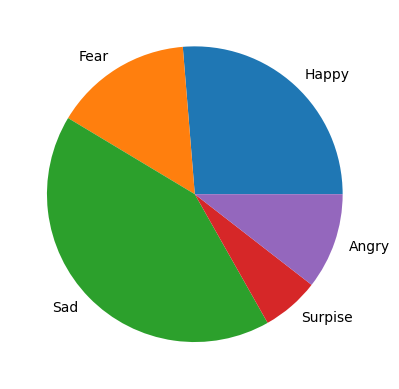

In [ ]:
print (emo_te)

from collections import Counter

w = Counter(emo_te)
print(w)

mylabels = ["Happy", "Fear", "Sad", "Surpise", "Angry"]
plt.pie(w.values(), labels = mylabels)
plt.show()

Count the results for the Pie Chart

In [ ]:
emo_te= [] 
for i in rishi_tweets['edited_tweet'].values.tolist():
  emotion = te.get_emotion(i)
  print(emotion) 
  keymax =max(emotion, key=emotion.get)
  emo_te.append(keymax)
 # print(emo_te)

Streaming output truncated to the last 5000 lines.
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.33, 'Sad': 0.33, 'Fear': 0.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.17, 'Sad': 0.17, 'Fear': 0.67}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}
{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.5}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33, 'Sad': 0.33, 

['Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Happy', 'Fear', 'Fear', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Fear', 'Happy', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Surprise', 'Happy', 'Surprise', 'Happy', 'Sad', 'Happy', 'Happy', 'Happy', 'Sad', 'Surprise', 'Happy', 'Surprise', 'Fear', 'Surprise', 'Fear', 'Happy', 'Sad', 'Sad', 'Happy', 'Fear', 'Surprise', 'Sad', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Fear', 'Happy', 'Angry', 'Happy', 'Sad', 'Surprise', 'Happy', 'Surprise', 'Happy', 'Surprise', 'Happy', 'Surprise', 'Happy', 'Fear', 'Surprise', 'Surprise', 'Sad', 'Happy', 'Sad', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Happy', 'Fear', 'Surprise', 'Surprise', 'Happy', 'Happy', 'Surprise', 'Surprise', 'Fear', 'Happy', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Fear', 'Fear', 'Happy', 'Happy', 'Fear', 'Happy', 'Happy', 'Surprise', 'Happy', 'Happy', 'Surprise', 

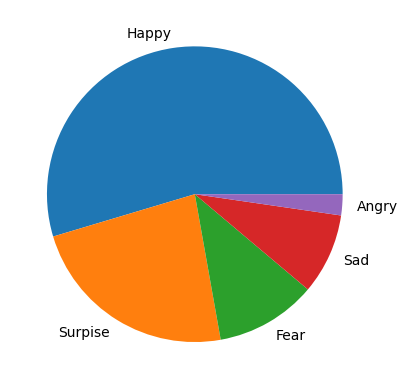

In [ ]:
print (emo_te1)

from collections import Counter

w = Counter(emo_te1)
print(w)

mylabels = ["Happy", "Surpise", "Fear", "Sad", "Angry"]
plt.pie(w.values(), labels = mylabels)
plt.show()

Rishi Sunak TextBlob, VADER and Text 2 Emotion Results and Pie Charts

In [ ]:
x=rishi_tweets.groupby('analysis')['analysis'].count()
neutral=rishi_tweets[rishi_tweets['analysis']=='Neutral']['edited_tweet'].count()
positive=rishi_tweets[rishi_tweets['analysis']=='Positive']['edited_tweet'].count()
negative=rishi_tweets[rishi_tweets['analysis']=='Negative']['edited_tweet'].count()

print(positive)

fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[positive,negative,neutral])])
fig.update_layout(title_text='Sentiment Analysis of Rishi (TextBlob)')
fig.show()

40255


In [ ]:
fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[summary["positive"],summary["negative"],summary["neutral"]])])
fig.update_layout(title_text='Sentiment analysis of Rishi Sunak (VADER)')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=["Happy","Fear","Sad","Surpise","Angry"], values=[41126, 25866, 15866, 14850, 6195])])
fig.update_layout(title_text='Emotional analysis of Rishi Sunak (Text2Emotion)')
fig.show()




Joe Biden TextBlob, VADER and Text 2 Emotion Results and Pie Charts

In [ ]:
x=biden_tweets.groupby('analysis')['analysis'].count()
neutral=biden_tweets[biden_tweets['analysis']=='Neutral']['edited_tweet'].count()
positive=biden_tweets[biden_tweets['analysis']=='Positive']['edited_tweet'].count()
negative=biden_tweets[biden_tweets['analysis']=='Negative']['edited_tweet'].count()

fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[positive,negative,neutral])])
fig.update_layout(title_text='Sentiment analysis of Joe Biden (TextBlob)')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[summary1["positive"],summary1["negative"],summary1["neutral"]])])
fig.update_layout(title_text='Sentiment analysis of Joe Biden (VADER)')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=["Happy","Surpise","Fear","Sad","Angry"], values=[54640, 23188, 11057, 8843, 2301])])
fig.update_layout(title_text='Emotional analysis of Joe Biden (Text2Emotion)')
fig.show()


Word Cloud for both data sets

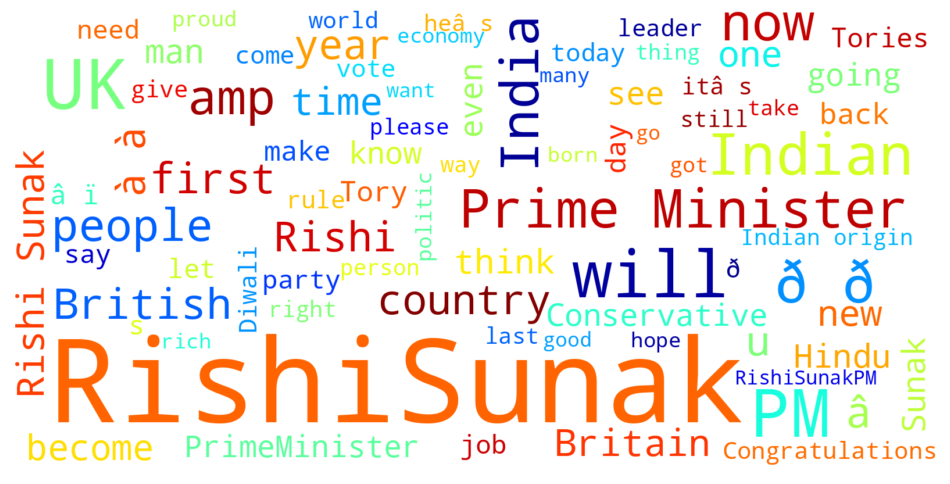

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df['text'][0:1000])

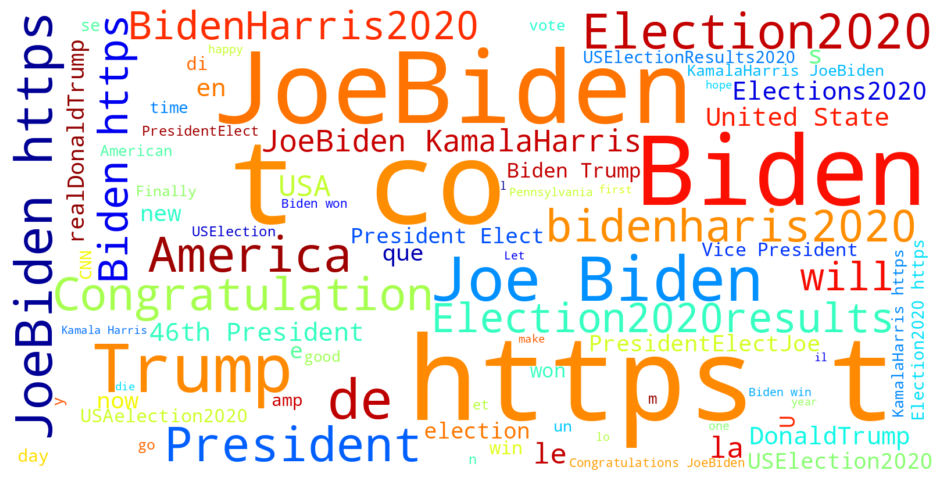

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweets_biden['tweet'][0:1000])